## What is Siphon

Siphon is a collection of Python utilities for downloading data from remote data services. Much of Siphon’s current functionality focuses on access to data hosted on a THREDDS Data Server. It also provides clients to a variety of simple web services.

On line help:
https://unidata.github.io/siphon/latest/index.html

Unidata has a siphon tutorial here:  https://unidata.github.io/python-training/workshop/Siphon/siphon-overview/

Another tutorial from ESIP here:  https://esip.figshare.com/articles/Siphon_Tutorial_ipynb/5244637

Install Siphon:
Anaconda install:
`conda install -c conda-forge siphon`

In [1]:
from datetime import datetime, timedelta
from siphon.catalog import TDSCatalog

Here's the url for Daymet daily data

https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/catalog.html

or in a year
https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/1980/catalog.html

Here's the example from UCAR's siphon tutorial

cat = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/nexrad/level3/'
                 f'N0Q/LRX/{date:%Y%m%d}/catalog.xml')

----

##  1. Use Siphon to Access the Daymet Daily Data THREDDS Catalog

In [2]:
# Using Siphon, navigate from the top-level THREDDS catalog for Daymet Daily data at 
#                      https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/catalog.html
# This takes care of downloading the catalog, parsing the XML, and doing useful things. 
# top_cat means top of catalog.  There's a warning about changing from html to xml, but that's ok.
top_cat = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/catalog.html')

C:\Users\myt\AppData\Local\Continuum\anaconda3\lib\site-packages\siphon\catalog.py:268: UserWarning: URL https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/catalog.html returned HTML. Changing to: https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/catalog.xml
  new_url))


In [3]:
# From here we can do things like look at all the catalog references...
# Can see what's available at the top 'reference' level. 
list(top_cat.catalog_refs)

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [4]:
#Or loop thru the list.
for ref in top_cat.catalog_refs:
    print(ref)

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [5]:
#We can also extract by using the name of the item:
ref = top_cat.catalog_refs['1980']
ref.href

'https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/1980/catalog.xml'

In [6]:
daymet_cat_1980 = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/1980/catalog.html')

C:\Users\myt\AppData\Local\Continuum\anaconda3\lib\site-packages\siphon\catalog.py:268: UserWarning: URL https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/1980/catalog.html returned HTML. Changing to: https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/1980/catalog.xml
  new_url))


In [7]:
# Use the datasets attribute to see the list of datasets available
daymet_cat_1980.datasets
#or
list(daymet_cat_1980.datasets)

['Daymet v3 daylength for hawaii (1980)',
 'Daymet v3 daylength for na (1980)',
 'Daymet v3 daylength for puertorico (1980)',
 'Daymet v3 precipitation for hawaii (1980)',
 'Daymet v3 precipitation for na (1980)',
 'Daymet v3 precipitation for puertorico (1980)',
 'Daymet v3 shortwave radiation for hawaii (1980)',
 'Daymet v3 shortwave radiation for na (1980)',
 'Daymet v3 shortwave radiation for puertorico (1980)',
 'Daymet v3 snow-water equivalent for hawaii (1980)',
 'Daymet v3 snow-water equivalent for na (1980)',
 'Daymet v3 snow-water equivalent for puertorico (1980)',
 'Daymet v3 daily maximum temperature for hawaii (1980)',
 'Daymet v3 daily maximum temperature for na (1980)',
 'Daymet v3 daily maximum temperature for puertorico (1980)',
 'Daymet v3 daily minimum temperature for hawaii (1980)',
 'Daymet v3 daily minimum temperature for na (1980)',
 'Daymet v3 daily minimum temperature for puertorico (1980)',
 'Daymet v3 vapor pressure for hawaii (1980)',
 'Daymet v3 vapor press

In [8]:
#or - handy for looping if needed
for ref in daymet_cat_1980.datasets:
    print(ref)

Daymet v3 daylength for hawaii (1980)
Daymet v3 daylength for na (1980)
Daymet v3 daylength for puertorico (1980)
Daymet v3 precipitation for hawaii (1980)
Daymet v3 precipitation for na (1980)
Daymet v3 precipitation for puertorico (1980)
Daymet v3 shortwave radiation for hawaii (1980)
Daymet v3 shortwave radiation for na (1980)
Daymet v3 shortwave radiation for puertorico (1980)
Daymet v3 snow-water equivalent for hawaii (1980)
Daymet v3 snow-water equivalent for na (1980)
Daymet v3 snow-water equivalent for puertorico (1980)
Daymet v3 daily maximum temperature for hawaii (1980)
Daymet v3 daily maximum temperature for na (1980)
Daymet v3 daily maximum temperature for puertorico (1980)
Daymet v3 daily minimum temperature for hawaii (1980)
Daymet v3 daily minimum temperature for na (1980)
Daymet v3 daily minimum temperature for puertorico (1980)
Daymet v3 vapor pressure for hawaii (1980)
Daymet v3 vapor pressure for na (1980)
Daymet v3 vapor pressure for puertorico (1980)


In [9]:
dataset13 = daymet_cat_1980.datasets[13]
print(dataset13)
# or
dataset13.name

Daymet v3 daily maximum temperature for na (1980)


'Daymet v3 daily maximum temperature for na (1980)'

In [10]:
# or
dataset_tmaxdaily1980 = daymet_cat_1980.datasets['Daymet v3 daily maximum temperature for na (1980)']
print(dataset_tmaxdaily1980)

Daymet v3 daily maximum temperature for na (1980)


In [11]:
# look at the access url's for a dataset
#ds.access_urls
dataset_tmaxdaily1980.access_urls

{'OPENDAP': 'https://thredds.daac.ornl.gov/thredds/dodsC/ornldaac/1328/1980/daymet_v3_tmax_1980_na.nc4',
 'HTTPServer': 'https://thredds.daac.ornl.gov/thredds/fileServer/ornldaac/1328/1980/daymet_v3_tmax_1980_na.nc4',
 'WCS': 'https://thredds.daac.ornl.gov/thredds/wcs/ornldaac/1328/1980/daymet_v3_tmax_1980_na.nc4',
 'WMS': 'https://thredds.daac.ornl.gov/thredds/wms/ornldaac/1328/1980/daymet_v3_tmax_1980_na.nc4',
 'NCML': 'https://thredds.daac.ornl.gov/thredds/ncml/ornldaac/1328/1980/daymet_v3_tmax_1980_na.nc4',
 'NetcdfSubset': 'https://thredds.daac.ornl.gov/thredds/ncss/grid/ornldaac/1328/1980/daymet_v3_tmax_1980_na.nc4',
 'ISO': 'https://thredds.daac.ornl.gov/thredds/iso/ornldaac/1328/1980/daymet_v3_tmax_1980_na.nc4',
 'UDDC': 'https://thredds.daac.ornl.gov/thredds/uddc/ornldaac/1328/1980/daymet_v3_tmax_1980_na.nc4'}

----

## 2.  Use Siphon to Remotely Access Data

In [12]:
# Using the same data we retrieved above:
# Not yet working with daily data.  The files need to be listed by name, not an alias.
daymet_cat_1980 = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/1980/catalog.html')
dataset_tmaxdaily1980_na = daymet_cat_1980.datasets['Daymet v3 daily maximum temperature for na (1980)']
dataset_tmaxdaily1980_hi = daymet_cat_1980.datasets['Daymet v3 daily maximum temperature for hawaii (1980)']

In [13]:
# Siphon can download the file locally.  
# PROBLEM:  This downloads a file, but need to add .nc to the name or it's not recognized as netCDF format.
# Would be best if file was listed by filename, not an alias
dataset_tmaxdaily1980_hi.download()

In [14]:
# Look in your file explorer panel or run the cell below to verify that the file was downloaded.
# But this isn't downloading the netCDF file.  The actual file names aren't liste, so it's downloading an object.
import os 
os.listdir()

['.ipynb_checkpoints',
 'Daymet v3 daily maximum temperature for hawaii (1980)',
 'Daymet v3 daily maximum temperature for hawaii (1980).nc4',
 'daymet_v3_tmax_annavg_1980_na.nc4',
 'Siphon.ipynb']

In [76]:
# Annual and monthly files are listed in TDS by name. Test with annual climatolgy.  
daymet_ann_cat = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.html')
daymet_ann_cat.datasets

['daymet_v3_prcp_annttl_1980_hi.nc4', 'daymet_v3_prcp_annttl_1980_na.nc4', 'daymet_v3_prcp_annttl_1980_pr.nc4', 'daymet_v3_prcp_annttl_1981_hi.nc4', 'daymet_v3_prcp_annttl_1981_na.nc4', 'daymet_v3_prcp_annttl_1981_pr.nc4', 'daymet_v3_prcp_annttl_1982_hi.nc4', 'daymet_v3_prcp_annttl_1982_na.nc4', 'daymet_v3_prcp_annttl_1982_pr.nc4', 'daymet_v3_prcp_annttl_1983_hi.nc4', 'daymet_v3_prcp_annttl_1983_na.nc4', 'daymet_v3_prcp_annttl_1983_pr.nc4', 'daymet_v3_prcp_annttl_1984_hi.nc4', 'daymet_v3_prcp_annttl_1984_na.nc4', 'daymet_v3_prcp_annttl_1984_pr.nc4', 'daymet_v3_prcp_annttl_1985_hi.nc4', 'daymet_v3_prcp_annttl_1985_na.nc4', 'daymet_v3_prcp_annttl_1985_pr.nc4', 'daymet_v3_prcp_annttl_1986_hi.nc4', 'daymet_v3_prcp_annttl_1986_na.nc4', 'daymet_v3_prcp_annttl_1986_pr.nc4', 'daymet_v3_prcp_annttl_1987_hi.nc4', 'daymet_v3_prcp_annttl_1987_na.nc4', 'daymet_v3_prcp_annttl_1987_pr.nc4', 'daymet_v3_prcp_annttl_1988_hi.nc4', 'daymet_v3_prcp_annttl_1988_na.nc4', 'daymet_v3_prcp_annttl_1988_pr.nc4', 

In [77]:
dataset_annavgtmax_na_1980 = daymet_ann_cat.datasets['daymet_v3_tmax_annavg_1980_na.nc4']
print(dataset_annavgtmax_na_1980)

daymet_v3_tmax_annavg_1980_na.nc4


In [17]:
#Takes a while to download.  Commenting out for convenience.
#dataset_annavgtmax_na_1980.download()

You can also read from the file as if it were local using a 'file-like object'
For this dataset, these next couple lines can be skipped for the next option below because we can read it as a netCDF file.
Keeping here for reference.

fobj = dataset_annavgtmax_na1980.remote_open()

data_annavgtmax_na1980 = fobj.read()

In [78]:
# This is handy if you have Python code to read a particular format.
# It's also possible to get access to the file through services that provide netCDF4-like access, but for the remote file. 
# This access allows downloading information only for variables of interest, or for (index-based) subsets of that data.

#nc = dataset_annavgtmax_na_1980.remote_access()
#print(nc)

annavgtmax_na_1980_remote = dataset_annavgtmax_na_1980.remote_access()
print(annavgtmax_na_1980_remote)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    start_year: 1980
    source: Daymet Software Version 3.0
    Version_software: Daymet Software Version 3.0
    Version_data: Daymet Data Version 3.0
    Conventions: CF-1.6
    citation: Please see http://daymet.ornl.gov/ for current Daymet data citation information
    references: Please see http://daymet.ornl.gov/ for current information on Daymet references
    DODS_EXTRA.Unlimited_Dimension: time
    dimensions(sizes): time(1), nv(2), x(7814), y(8075)
    variables(dimensions): float32 time_bnds(time,nv), int16 lambert_conformal_conic(), float32 time(time), float32 x(x), float32 y(y), float32 lat(y,x), float32 lon(y,x), float32 tmax(time,y,x)
    groups: 



In [79]:
list(annavgtmax_na_1980_remote.variables)

['time_bnds',
 'lambert_conformal_conic',
 'time',
 'x',
 'y',
 'lat',
 'lon',
 'tmax']

In [80]:
#print(nc.variables.keys())
print(annavgtmax_na_1980_remote.variables['tmax'])

<class 'netCDF4._netCDF4.Variable'>
float32 tmax(time, y, x)
    _FillValue: -9999.0
    coordinates: lat lon
    grid_mapping: lambert_conformal_conic
    missing_value: -9999.0
    units: degrees C
    cell_methods: area: mean time: minimum within days time: mean over days
    long_name: annual average of daily maximum temperature
    _ChunkSizes: [   1 1010  977]
unlimited dimensions: time
current shape = (1, 8075, 7814)
filling off



RuntimeError: NetCDF: Access failure

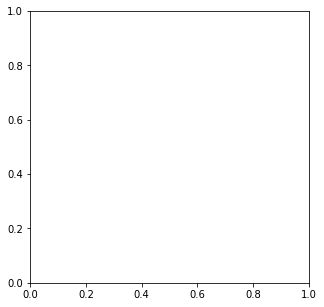

In [84]:
# ???? Problem with netCDF access.  Works sometimes, but often failing ????
# Plot small sample image
daymet_ann_cat = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.html')
dataset_annavgtmax_hi_1981 = daymet_ann_cat.datasets['daymet_v3_tmax_annavg_1981_hi.nc4']
annavgtmax_hi_1981_remote = dataset_annavgtmax_hi_1981.remote_access()

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
#imgplot = ax.imshow(annavgtmax_na_1980_remote.variables['tmax'][0, :5000, :5000], cmap='jet', interpolation='none')
#ax.imshow(nc.variables['tmax'][0, :1000, :1000], cmap='jet', interpolation='none')
#plt.show()
imgplot = ax.imshow(annavgtmax_hi_1981_remote.variables['tmax'][0, :500, :500], cmap='jet', interpolation='none')
#imgplot = plt.imshow(nc.variables['tmax'][0, :5000, :5000], cmap='jet', interpolation='none')

#fig.suptitle('Average Daily Maximum Temperature - 1980', fontsize=16)
#plt.colorbar()

----

## 3. Using Siphon to Subset Data

For some datasets, subset support is availble:

* Defaults to netCDF Subset Service (NCSS)
* Allows specifying latitude, longitude, time, and variables
* NCSS downloads a netCDF file
* To use NCSS, we can call subset and get a client.

In [35]:
#To use NCSS, we can call subset and get a client.
# Get the value for one lon,lat from annual data
# (Below steps, do this with monthly data.  It will have 12 time steps.  Need to get daily data recognized.)

dataset_annavgtmax_na1980 = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.html').datasets['daymet_v3_tmax_annavg_1980_na.nc4']
ncss = dataset_annavgtmax_na1980.subset()
ncss.variables


C:\Users\myt\AppData\Local\Continuum\anaconda3\lib\site-packages\siphon\catalog.py:268: UserWarning: URL https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.html returned HTML. Changing to: https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.xml
  new_url))


{'lat', 'lon', 'tmax'}

In [36]:
# With this client we can set up a query for the data we want
# Point Query

query = ncss.query()
query.lonlat_point(lon=-105, lat=40)
query.all_times()
query.variables('tmax')
query.accept('netcdf')

var=tmax&temporal=all&longitude=-105&latitude=40&accept=netcdf

In [37]:
# Next, get the data, which will return it as an already opened netCDF4 object. The annual climatology only has one time step.

nc_ann = ncss.get_data(query)
tmax_point_data = nc_ann.variables['tmax'][:]
times = nc_ann.variables['time'][:]
print(times)
print(tmax_point_data)

[182.5]
[18.427397]


C:\Users\myt\AppData\Local\Continuum\anaconda3\lib\site-packages\siphon\catalog.py:268: UserWarning: URL https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1345/catalog.html returned HTML. Changing to: https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1345/catalog.xml
  new_url))


{'lon', 'lat', 'tmax'}
[ 15.5  45.5  75.5 106.  136.5 167.  197.5 228.5 259.  289.5 320.  350. ]
[ 2.967742  7.206897  9.5      15.316667 19.725807 30.95     32.596775
 30.532259 27.116667 19.306452 12.633333 12.766666]


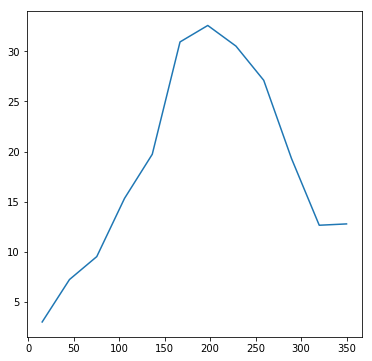

In [38]:
# Monthly Climatology
# Doing this with monthly data.  It will have 12 time steps.

dataset_monavgtmax_na1980 = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1345/catalog.html').datasets['daymet_v3_tmax_monavg_1980_na.nc4']
ncss = dataset_monavgtmax_na1980.subset()
print(ncss.variables)

query = ncss.query()
query.lonlat_point(lon=-105, lat=40)
query.all_times()
query.variables('tmax')
query.accept('netcdf')

nc_ann = ncss.get_data(query)
tmax_point_data = nc_ann.variables['tmax'][:]
times = nc_ann.variables['time'][:]
print(times)
print(tmax_point_data)

g, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(times, tmax_point_data)

In [40]:
# Gridded Subset with a lon/lat Bounding Box
##### Request the data for a particular time for a gridded subset or region of interest.

# First, with annual data
dataset_annavgtmax_na1980 = TDSCatalog('https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1343/catalog.html').datasets['daymet_v3_tmax_annavg_1980_na.nc4']
ncss_anntmax80 = dataset_annavgtmax_na1980.subset()
ncss_anntmax80.variables

query = ncss_anntmax80.query()
query.lonlat_box(east=-85, west=-90, south=40, north=45)
query.all_times()
query.variables('tmax')
query.accept('netcdf')
nc_subset_anntmax80 = ncss_anntmax80.get_data(query)


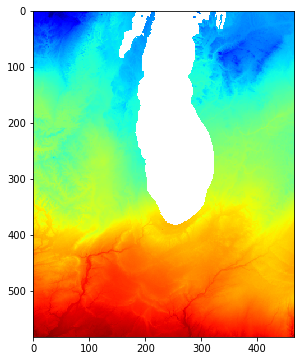

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(nc_subset_anntmax80.variables['tmax'][0], cmap='jet')

In [ ]:
# Next, subset with time